In [2]:
import numpy as np
import math

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

import scipy
from scipy import interpolate
from scipy.sparse import diags
import scipy.sparse as sp

import matplotlib.tri as tri
import matplotlib.pyplot as plt

import pandas as pd

from multiprocessing import Pool
from tqdm import tqdm 

PI = math.pi

In [28]:

    
data = pd.read_csv('C1d_center_time_series_10min.txt')
concnt1d = data.values    
    
    
data = pd.read_csv('C2d_center_time_series_10min.txt')
concnt2d = data.values
 

In [29]:
data['0'].shape


(287,)

In [30]:
i_10min = []
for i in np.arange(0,287,1):
    i_10min.append(i+1)
    

(257, 262)

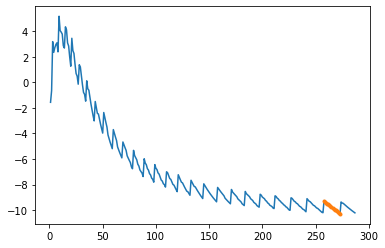

In [79]:
time = 257
plt.plot( i_10min, 100*(concnt1d-concnt2d)/concnt2d )
plt.plot( i_10min[time:time+16], 100*(concnt1d[time:time+16]-concnt2d[time:time+16])/concnt2d[time:time+16], '.' )
time, time+5

In [108]:
concnt1d_hour, concnt2d_hour = [],[]
i_hour = []
Dh = 12

for i in range(0,int(288/Dh),1):
    i_hour.append(i*Dh/6)
    
    concnt1d_hour.append( np.mean(concnt1d[i*Dh:i*Dh+Dh]) )
    concnt2d_hour.append( np.mean(concnt2d[i*Dh:i*Dh+Dh]) )

    print(i,i*Dh,i*Dh+Dh)

concnt1d_hour = np.array(concnt1d_hour)
concnt2d_hour = np.array(concnt2d_hour)

0 0 12
1 12 24
2 24 36
3 36 48
4 48 60
5 60 72
6 72 84
7 84 96
8 96 108
9 108 120
10 120 132
11 132 144
12 144 156
13 156 168
14 168 180
15 180 192
16 192 204
17 204 216
18 216 228
19 228 240
20 240 252
21 252 264
22 264 276
23 276 288


Text(0.5, 0, 'Time [hour]')

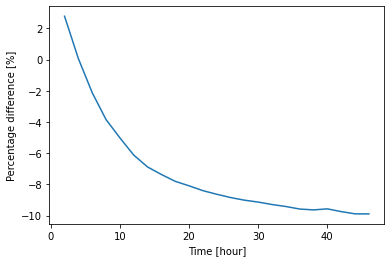

In [109]:
init = 1
plt.plot( i_hour[init::], 100*(concnt1d_hour[init::]-concnt2d_hour[init::])/concnt2d_hour[init::] )
plt.ylabel('Percentage difference [%]')
plt.xlabel('Time [hour]')